# Session 3.2: Interactive Visualization dengan Plotly

**Durasi:** 45 menit  
**Dataset:** RUP 2025

## Tujuan Pembelajaran
- Membuat interactive charts dengan Plotly Express
- Menggunakan Plotly Graph Objects untuk customization
- Menambahkan interactivity: hover, zoom, filter
- Export charts sebagai HTML

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Dataset RUP

In [2]:
# Load data
data_path = Path('../../../datasets/rup/RUP-PaketPenyedia-Terumumkan-2025.parquet')
df = pd.read_parquet(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (16430, 48)
Columns: ['tahun_anggaran', 'kd_klpd', 'nama_klpd', 'jenis_klpd', 'kd_satker', 'kd_satker_str', 'nama_satker', 'kd_rup', 'nama_paket', 'pagu', 'kd_metode_pengadaan', 'metode_pengadaan', 'kd_jenis_pengadaan', 'jenis_pengadaan', 'status_pradipa', 'status_pdn', 'status_ukm', 'alasan_non_ukm', 'status_konsolidasi', 'tipe_paket', 'kd_rup_swakelola', 'kd_rup_lokal', 'volume_pekerjaan', 'urarian_pekerjaan', 'spesifikasi_pekerjaan', 'tgl_awal_pemilihan', 'tgl_akhir_pemilihan', 'tgl_awal_kontrak', 'tgl_akhir_kontrak', 'tgl_awal_pemanfaatan', 'tgl_akhir_pemanfaatan', 'tgl_buat_paket', 'tgl_pengumuman_paket', 'nip_ppk', 'nama_ppk', 'username_ppk', 'status_aktif_rup', 'status_delete_rup', 'status_umumkan_rup', 'status_dikecualikan', 'alasan_dikecualikan', 'tahun_pertama', 'kode_rup_tahun_pertama', 'nomor_kontrak', 'spp_aspek_ekonomi', 'spp_aspek_sosial', 'spp_aspek_lingkungan', '_event_date']


,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,...,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
0,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264455,1.02.0.00.0.00.03.0000,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,53540979,Belanja Bahan Makanan dan Minuman Pasien,7700000000,...,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
1,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53688068,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,300000000,...,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
2,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53699505,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,1200000000,...,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
3,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700150,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,1200000000,...,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
4,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700183,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,1500000000,...,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05


## 3. Plotly Express - Quick Interactive Charts

### 3.1 Interactive Bar Chart - Top Satker

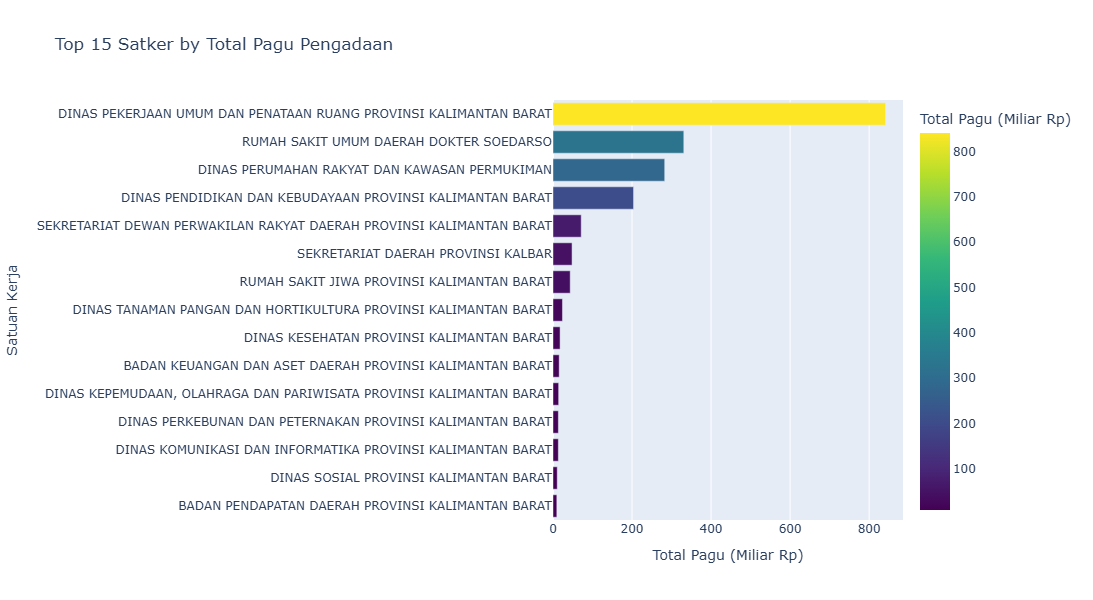

In [3]:
# Aggregate data
top_satker = df.groupby('nama_satker')['pagu'].agg(['sum', 'count']).reset_index()
top_satker.columns = ['Satker', 'Total_Pagu', 'Jumlah_Paket']
top_satker = top_satker.sort_values('Total_Pagu', ascending=False).head(15)
top_satker['Total_Pagu_Miliar'] = top_satker['Total_Pagu'] / 1_000_000_000

# Create interactive bar chart
fig = px.bar(top_satker, 
             x='Total_Pagu_Miliar', 
             y='Satker',
             orientation='h',
             title='Top 15 Satker by Total Pagu Pengadaan',
             labels={'Total_Pagu_Miliar': 'Total Pagu (Miliar Rp)', 'Satker': 'Satuan Kerja'},
             hover_data={'Jumlah_Paket': True, 'Total_Pagu_Miliar': ':.2f'},
             color='Total_Pagu_Miliar',
             color_continuous_scale='Viridis')

fig.update_layout(
    height=600,
    yaxis={'categoryorder': 'total ascending'},
    hovermode='closest'
)

fig.show()

### 3.2 Interactive Histogram - Distribusi Pagu

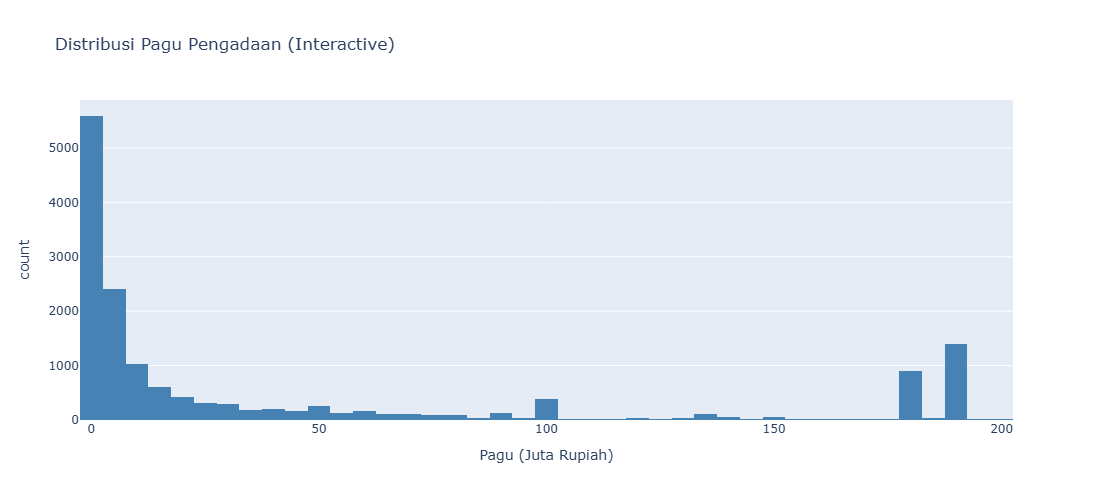

In [4]:
# Filter data
df_filtered = df[df['pagu'] < df['pagu'].quantile(0.95)].copy()
df_filtered['pagu_juta'] = df_filtered['pagu'] / 1_000_000

# Create histogram
fig = px.histogram(df_filtered, 
                   x='pagu_juta',
                   nbins=50,
                   title='Distribusi Pagu Pengadaan (Interactive)',
                   labels={'pagu_juta': 'Pagu (Juta Rupiah)', 'count': 'Frekuensi'},
                   color_discrete_sequence=['steelblue'])

fig.update_layout(
    height=500,
    showlegend=False,
    hovermode='x unified'
)

fig.show()

### 3.3 Scatter Plot - Pagu vs Jumlah Paket

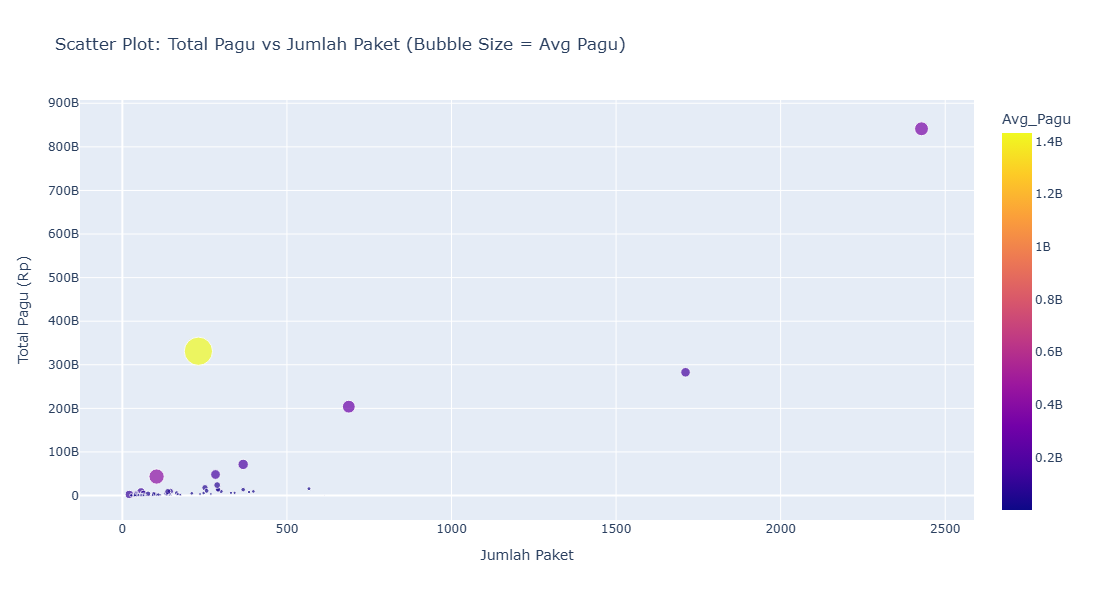

In [5]:
# Aggregate by satker
satker_stats = df.groupby('nama_satker').agg({
    'pagu': ['sum', 'mean', 'count']
}).reset_index()
satker_stats.columns = ['Satker', 'Total_Pagu', 'Avg_Pagu', 'Jumlah_Paket']
satker_stats = satker_stats[satker_stats['Jumlah_Paket'] >= 5]  # Filter minimum 5 paket

# Create scatter plot
fig = px.scatter(satker_stats,
                 x='Jumlah_Paket',
                 y='Total_Pagu',
                 size='Avg_Pagu',
                 hover_name='Satker',
                 title='Scatter Plot: Total Pagu vs Jumlah Paket (Bubble Size = Avg Pagu)',
                 labels={'Jumlah_Paket': 'Jumlah Paket', 'Total_Pagu': 'Total Pagu (Rp)'},
                 color='Avg_Pagu',
                 color_continuous_scale='Plasma',
                 opacity=0.7)

fig.update_layout(height=600)
fig.show()

### 3.4 Box Plot - Pagu by Metode Pengadaan

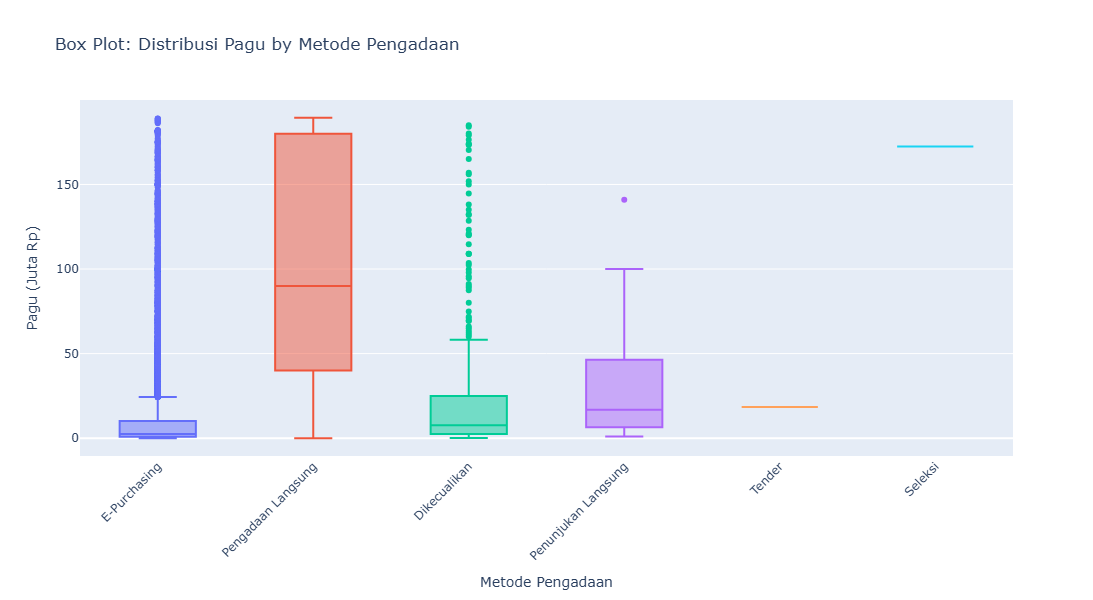

In [6]:
# Filter top methods and reasonable range
top_methods = df['metode_pengadaan'].value_counts().head(6).index
df_box = df[df['metode_pengadaan'].isin(top_methods) & (df['pagu'] < df['pagu'].quantile(0.90))].copy()
df_box['pagu_juta'] = df_box['pagu'] / 1_000_000

# Create box plot
fig = px.box(df_box,
             x='metode_pengadaan',
             y='pagu_juta',
             title='Box Plot: Distribusi Pagu by Metode Pengadaan',
             labels={'metode_pengadaan': 'Metode Pengadaan', 'pagu_juta': 'Pagu (Juta Rp)'},
             color='metode_pengadaan',
             points='outliers')  # Show outlier points

fig.update_layout(
    height=600,
    showlegend=False,
    xaxis_tickangle=-45
)

fig.show()

### 3.5 Sunburst Chart - Hierarchical View

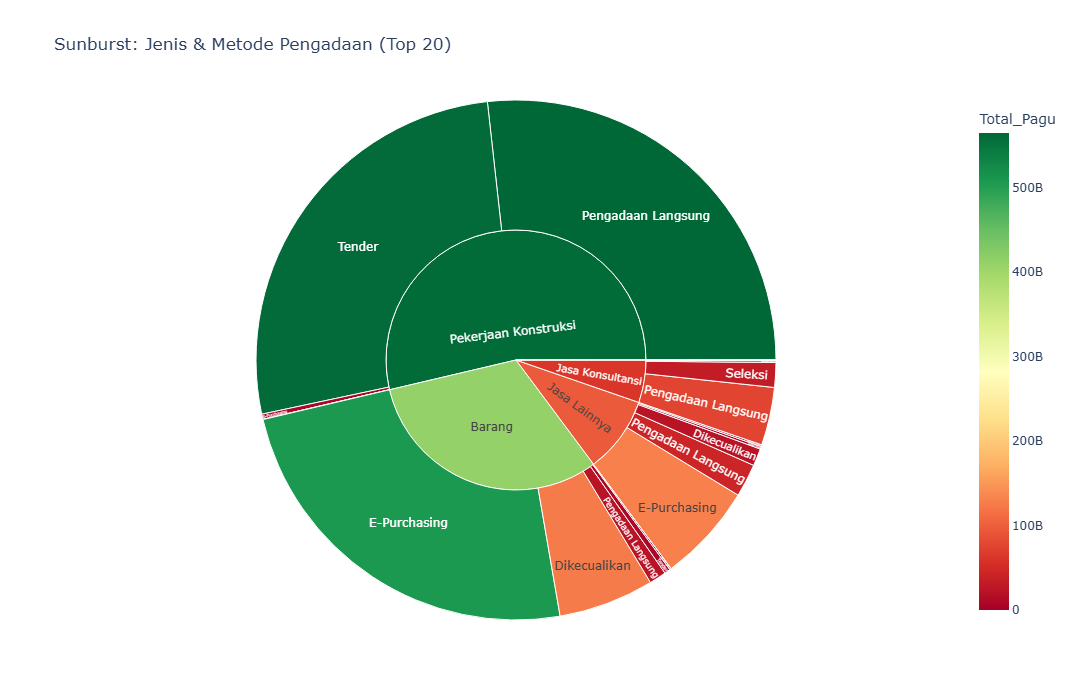

In [8]:
# Prepare hierarchical data
if 'jenis_pengadaan' in df.columns:
    hierarchy = df.groupby(['jenis_pengadaan', 'metode_pengadaan']).agg({
        'pagu': 'sum',
        'kd_rup': 'count'
    }).reset_index()
    hierarchy.columns = ['Jenis', 'Metode', 'Total_Pagu', 'Jumlah']
    
    # Get top combinations
    hierarchy = hierarchy.nlargest(20, 'Total_Pagu')
    
    # Create sunburst
    fig = px.sunburst(hierarchy,
                      path=['Jenis', 'Metode'],
                      values='Total_Pagu',
                      title='Sunburst: Jenis & Metode Pengadaan (Top 20)',
                      color='Total_Pagu',
                      color_continuous_scale='RdYlGn',
                      hover_data={'Jumlah': True})
    
    fig.update_layout(height=700)
    fig.show()
else:
    print("Column 'jenis_pengadaan' not found")

### 3.6 Treemap - Metode Pengadaan

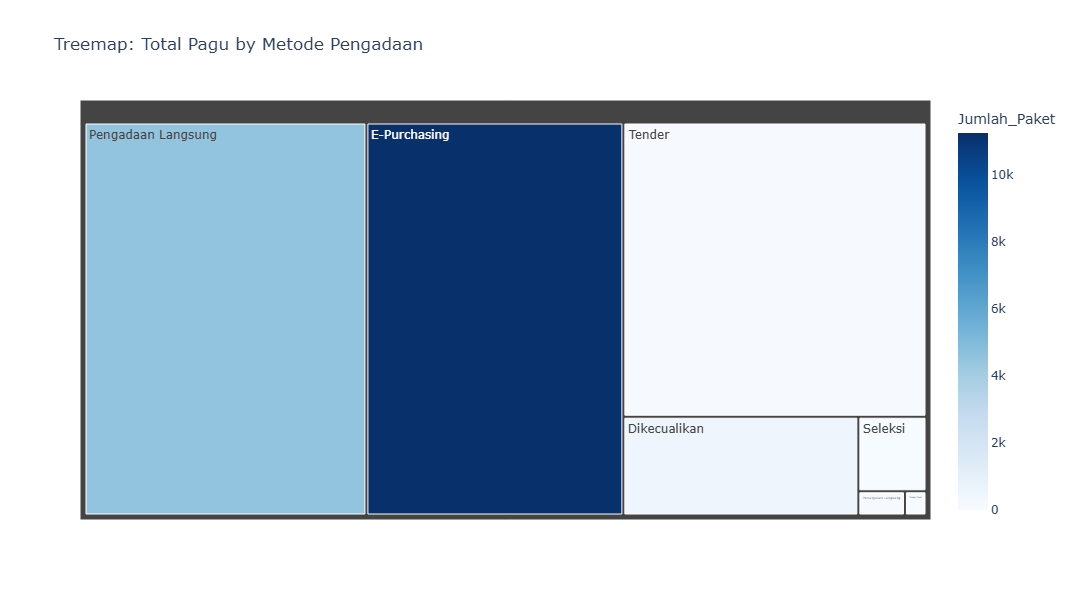

In [10]:
# Aggregate by metode
metode_agg = df.groupby('metode_pengadaan').agg({
    'pagu': 'sum',
    'kd_rup': 'count'
}).reset_index()
metode_agg.columns = ['Metode', 'Total_Pagu', 'Jumlah_Paket']

# Create treemap
fig = px.treemap(metode_agg,
                 path=['Metode'],
                 values='Total_Pagu',
                 title='Treemap: Total Pagu by Metode Pengadaan',
                 color='Jumlah_Paket',
                 color_continuous_scale='Blues',
                 hover_data={'Jumlah_Paket': True, 'Total_Pagu': ':,.0f'})

fig.update_layout(height=600)
fig.show()

## 4. Time Series Visualization

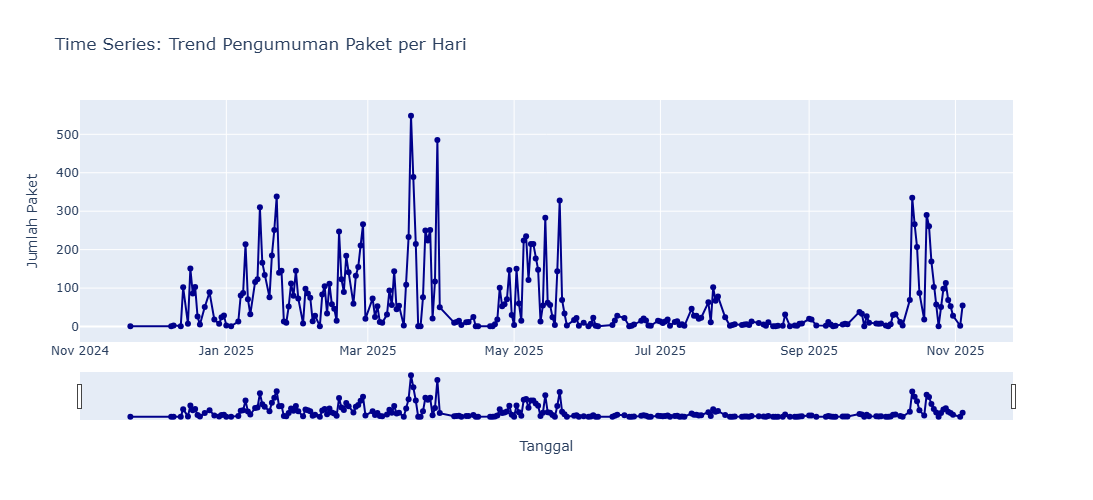

In [12]:
# Convert to datetime
if 'tgl_buat_paket' in df.columns:
    df['tanggal'] = pd.to_datetime(df['tgl_buat_paket'], errors='coerce')
    
    # Daily trend
    daily = df.groupby(df['tanggal'].dt.date).agg({
        'kd_rup': 'count',
        'pagu': 'sum'
    }).reset_index()
    daily.columns = ['Tanggal', 'Jumlah_Paket', 'Total_Pagu']
    daily['Total_Pagu_Miliar'] = daily['Total_Pagu'] / 1_000_000_000
    
    # Create line chart
    fig = px.line(daily,
                  x='Tanggal',
                  y='Jumlah_Paket',
                  title='Time Series: Trend Pengumuman Paket per Hari',
                  labels={'Tanggal': 'Tanggal', 'Jumlah_Paket': 'Jumlah Paket'},
                  markers=True)
    
    fig.update_traces(line_color='darkblue', line_width=2)
    fig.update_layout(
        height=500,
        hovermode='x unified',
        xaxis_rangeslider_visible=True  # Add range slider
    )
    
    fig.show()
else:
    print("Column 'tanggal_buat_paket' not found")

## 5. Plotly Graph Objects - Advanced Customization

### 5.1 Custom Bar Chart with Annotations

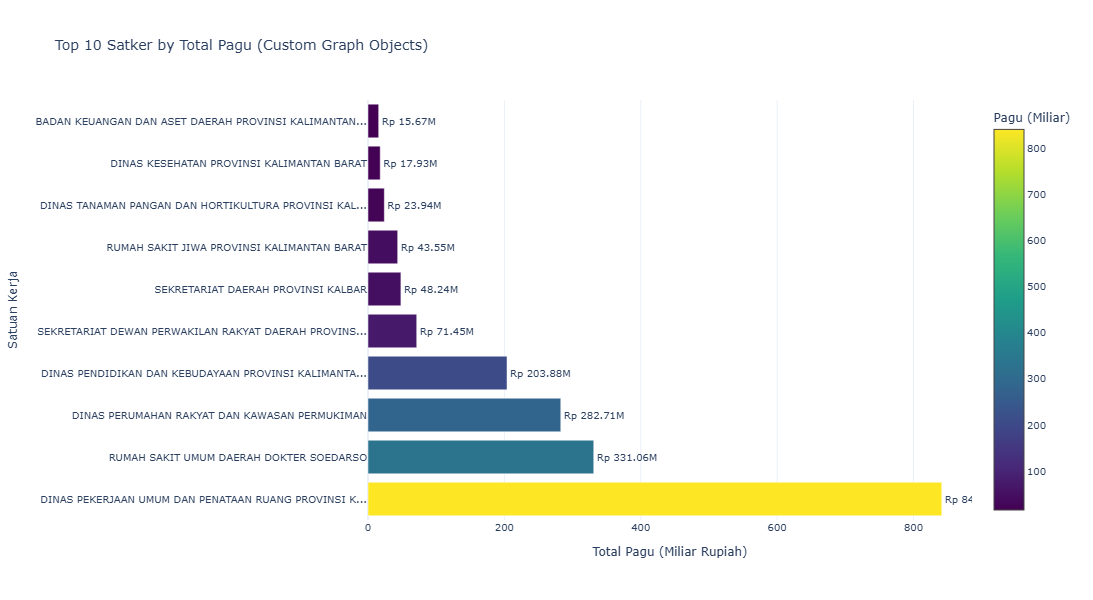

In [13]:
# Get top 10 satker
top10 = df.groupby('nama_satker')['pagu'].sum().sort_values(ascending=False).head(10)
top10_miliar = top10 / 1_000_000_000

# Create figure
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=top10_miliar.values,
    y=[name[:50] + '...' if len(name) > 50 else name for name in top10.index],
    orientation='h',
    marker=dict(
        color=top10_miliar.values,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Pagu (Miliar)")
    ),
    text=[f'Rp {val:.2f}M' for val in top10_miliar.values],
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Total Pagu: Rp %{x:.2f} Miliar<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Top 10 Satker by Total Pagu (Custom Graph Objects)',
    xaxis_title='Total Pagu (Miliar Rupiah)',
    yaxis_title='Satuan Kerja',
    height=600,
    template='plotly_white',
    font=dict(size=10)
)

fig.show()

### 5.2 Multiple Traces - Comparison

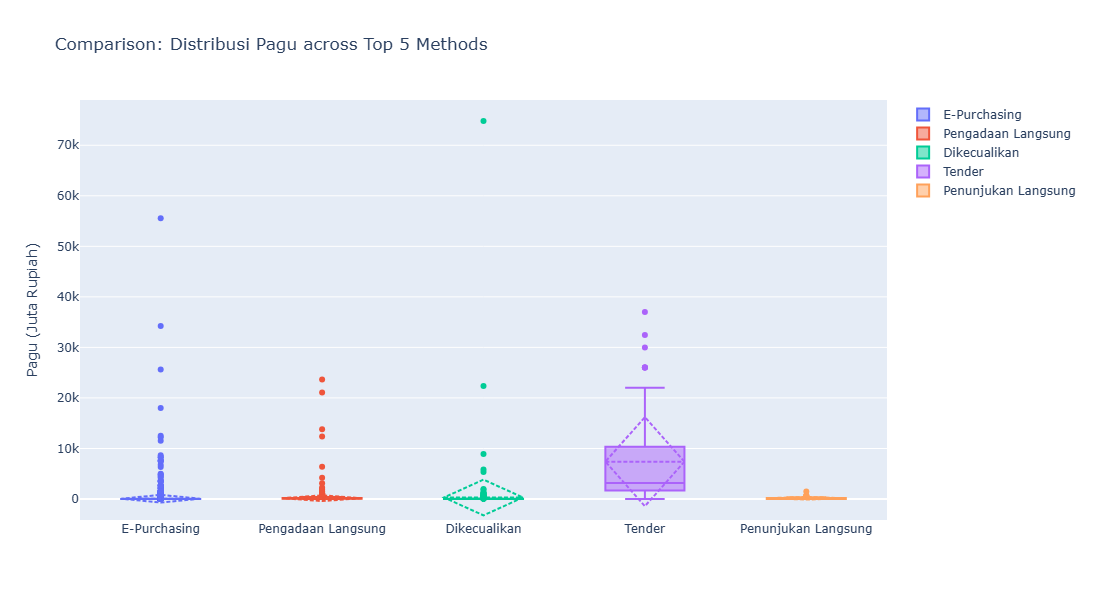

In [14]:
# Compare top 5 methods
top5_methods = df['metode_pengadaan'].value_counts().head(5).index

fig = go.Figure()

for method in top5_methods:
    method_data = df[df['metode_pengadaan'] == method]['pagu'] / 1_000_000
    
    fig.add_trace(go.Box(
        y=method_data,
        name=method[:30],  # Shorten name
        boxmean='sd'  # Show mean and standard deviation
    ))

fig.update_layout(
    title='Comparison: Distribusi Pagu across Top 5 Methods',
    yaxis_title='Pagu (Juta Rupiah)',
    height=600,
    showlegend=True,
    hovermode='closest'
)

fig.show()

## 6. Subplots - Dashboard Layout

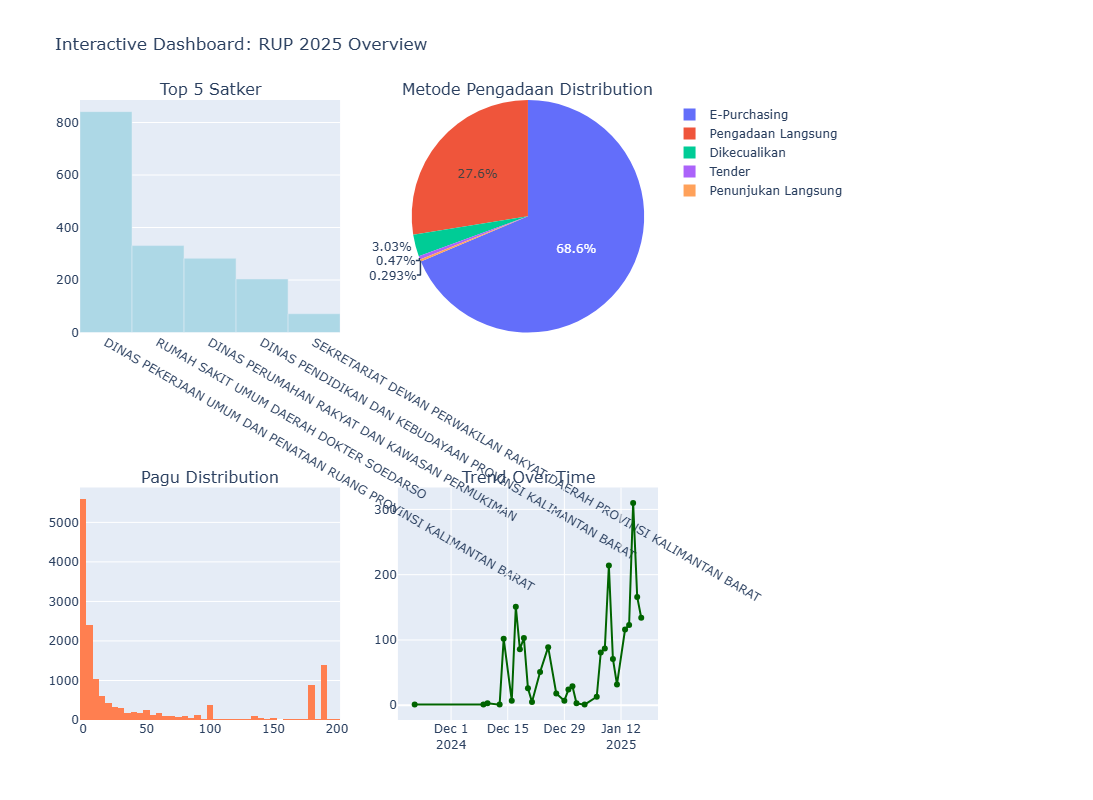

In [15]:
# Create subplots
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 5 Satker', 'Metode Pengadaan Distribution', 
                    'Pagu Distribution', 'Trend Over Time'),
    specs=[[{'type': 'bar'}, {'type': 'pie'}],
           [{'type': 'histogram'}, {'type': 'scatter'}]]
)

# Chart 1: Top 5 Satker
top5_satker = df.groupby('nama_satker')['pagu'].sum().sort_values(ascending=False).head(5)
fig.add_trace(
    go.Bar(x=top5_satker.index, y=top5_satker.values / 1_000_000_000, 
           name='Pagu', showlegend=False, marker_color='lightblue'),
    row=1, col=1
)

# Chart 2: Pie - Metode
metode_count = df['metode_pengadaan'].value_counts().head(5)
fig.add_trace(
    go.Pie(labels=metode_count.index, values=metode_count.values, name='Metode'),
    row=1, col=2
)

# Chart 3: Histogram
pagu_filtered = df[df['pagu'] < df['pagu'].quantile(0.95)]['pagu'] / 1_000_000
fig.add_trace(
    go.Histogram(x=pagu_filtered, name='Pagu', showlegend=False, marker_color='coral'),
    row=2, col=1
)

# Chart 4: Trend (if date available)
if 'tanggal' in df.columns:
    daily_count = df.groupby(df['tanggal'].dt.date).size()
    fig.add_trace(
        go.Scatter(x=list(daily_count.index)[:30], y=list(daily_count.values)[:30],
                   mode='lines+markers', name='Daily', showlegend=False,
                   line=dict(color='darkgreen')),
        row=2, col=2
    )

# Update layout
fig.update_layout(
    height=800,
    title_text="Interactive Dashboard: RUP 2025 Overview",
    showlegend=True
)

fig.show()

## 7. Export Interactive Charts

In [16]:
# Create output directory
output_dir = Path('../outputs')
output_dir.mkdir(exist_ok=True)

# Export as HTML
fig.write_html(output_dir / 'rup_interactive_dashboard.html')
print(f"✅ Interactive dashboard saved to {output_dir / 'rup_interactive_dashboard.html'}")
print("   You can open this file in a browser to interact with the charts!")

✅ Interactive dashboard saved to ../outputs/rup_interactive_dashboard.html
   You can open this file in a browser to interact with the charts!


## 8. Summary & Key Takeaways

### Plotly Express (Quick & Easy):
- ✅ `px.bar()` - Bar charts dengan hover
- ✅ `px.histogram()` - Interactive histograms
- ✅ `px.scatter()` - Scatter plots dengan size & color
- ✅ `px.box()` - Box plots dengan outliers
- ✅ `px.sunburst()` - Hierarchical visualization
- ✅ `px.treemap()` - Proportional rectangles
- ✅ `px.line()` - Time series dengan range slider

### Plotly Graph Objects (Advanced):
- ✅ `go.Figure()` - Custom figures
- ✅ `go.Bar()`, `go.Scatter()`, `go.Box()` - Custom traces
- ✅ `make_subplots()` - Multiple charts in one figure
- ✅ Custom hover templates
- ✅ Annotations dan shapes

### Interactivity Features:
- ✅ Hover untuk detail info
- ✅ Zoom in/out
- ✅ Pan untuk navigate
- ✅ Range slider untuk time series
- ✅ Click legend untuk show/hide traces
- ✅ Export as PNG dari browser

### Export Options:
- ✅ HTML file (dapat dibuka di browser)
- ✅ PNG image (dari browser)
- ✅ Embed in Streamlit app

## 9. Exercises

**Coba buat visualisasi interaktif berikut:**

1. **3D Scatter Plot** dengan 3 variabel numerik
2. **Animated Bar Chart Race** (jika ada time dimension)
3. **Waterfall Chart** untuk breakdown pagu
4. **Funnel Chart** untuk tahapan pengadaan
5. **Parallel Categories** untuk multiple categorical dimensions

**Advanced Challenges:**
- Tambahkan dropdown menu untuk filter metode
- Buat rangeslider untuk filter pagu range
- Tambahkan annotations untuk highlight insights
- Customize color scales dan themes
- Export dashboard lengkap sebagai standalone HTML